# **Project Name** - Tesla Stock Price Prediction

##### **Project Type**    - Deep Learning/EDA/NLP/(SimpleRNN and LSTM)

##### **Contribution**    - Vadla Shiva Kumar

# **Project Summary**

1. Problem Understanding

The objective of this project is to predict Tesla's stock prices using historical market data.
Stock price data is sequential in nature and is influenced by past price movements.

To effectively model these temporal dependencies, deep learning-based approaches such as
Simple Recurrent Neural Networks (SimpleRNN) and Long Short-Term Memory (LSTM) networks
are used.

These models are well-suited for time-series forecasting tasks as they can capture
patterns and trends over time.

2. Dataset Description:
The dataset consists of the following features:
- Date
- Open
- High
- Low
- Close
- Adjusted Close
- Volume

In this project, the focus is on predicting the **closing price** of Tesla stock using
historical data.


# **GitHub Link**

https://github.com/shivavadla931/Tesla-Stock-Price-Prediction.git

# **Problem Statement**

Build a predictive deep learning model to forecast Tesla’s stock closing price using:

- SimpleRNN and LSTM architectures
- 1-day, 5-day, and 10-day future predictions
- Historical adjusted close price as the primary feature
- GridSearchCV for tuning hyperparameters (units, dropout, learning rate)
- Visual comparison of actual vs predicted price trends


# ***Let's Begin !***

## ***1. Knowing Our Data***

Importing Libraries

In [68]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Loading

In [69]:
# Load Dataset

df = pd.read_csv('data/TESLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Dataset Rows& Columns count


In [70]:
# Dataset Rows & Columns count
df=pd.DataFrame(df)
df.shape

(2416, 7)

Dataset Information

In [71]:
# Dataset Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


Duplicate Values

In [72]:
# Data set duplicates count
df.duplicated().sum()

0

 Missing Values/Null Values

In [73]:
# Missing and Null values count
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## ***2. Understanding Our Variables***

In [74]:
# Data Types of Columns
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [75]:
# Dataset Columns
df=pd.DataFrame(df)
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [76]:
# Dataset Describe
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [77]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])
print(df.corr())

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999425  0.999575  0.998886   0.998886  0.501762
High       0.999425  1.000000  0.999389  0.999640   0.999640  0.512944
Low        0.999575  0.999389  1.000000  0.999447   0.999447  0.493496
Close      0.998886  0.999640  0.999447  1.000000   1.000000  0.505169
Adj Close  0.998886  0.999640  0.999447  1.000000   1.000000  0.505169
Volume     0.501762  0.512944  0.493496  0.505169   0.505169  1.000000


C:\Users\VADLAS\AppData\Local\Temp\ipykernel_10840\2594913941.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


Check Unique Values for each variable.

In [78]:
# Checking unique values
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

Date: 2416 unique values
Open: 2132 unique values
High: 2128 unique values
Low: 2136 unique values
Close: 2225 unique values
Adj Close: 2225 unique values
Volume: 2391 unique values


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Time-Series Line Charts**

Close Price Over Time

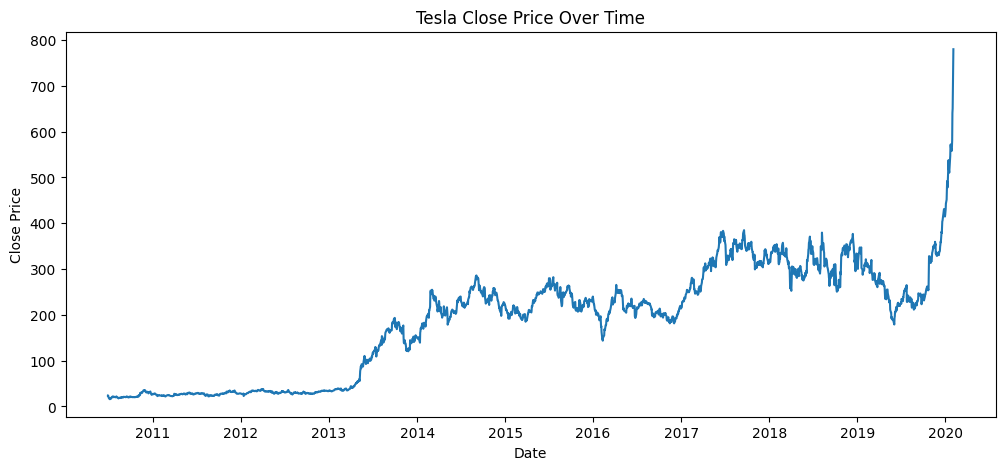

In [79]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'])
plt.title("Tesla Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

Volume Over Time

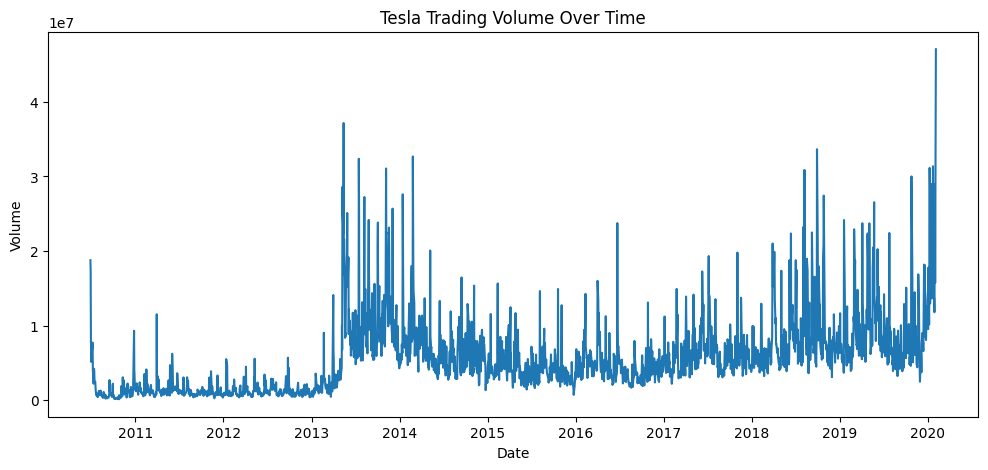

In [80]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Volume'])
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

#### **Distribution Plots**

Histogram for Numeric Columns

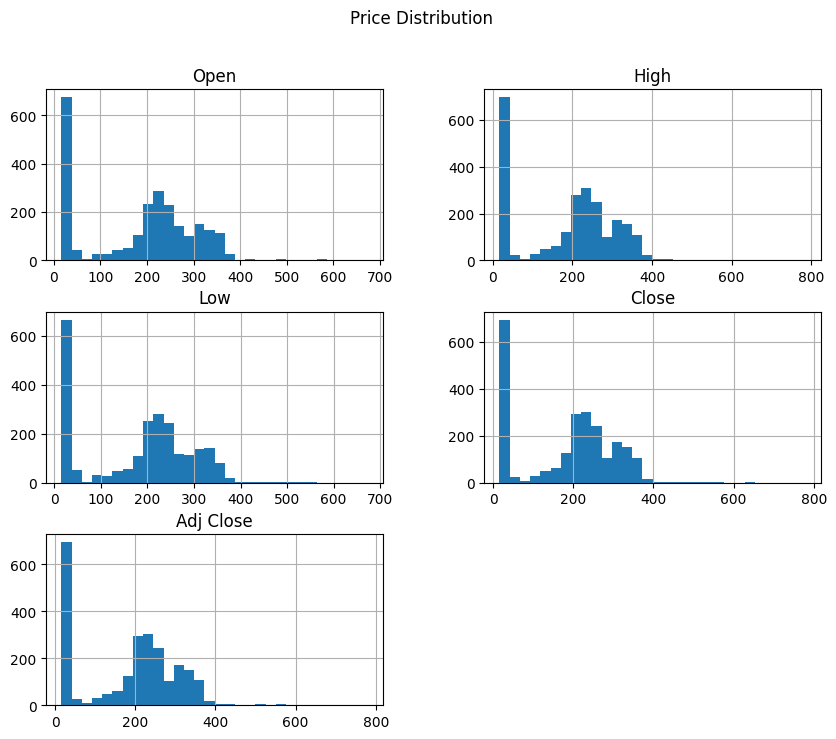

In [81]:
df[['Open','High','Low','Close','Adj Close']].hist(figsize=(10,8), bins=30)
plt.suptitle("Price Distribution")
plt.show()


Distribution of Volume

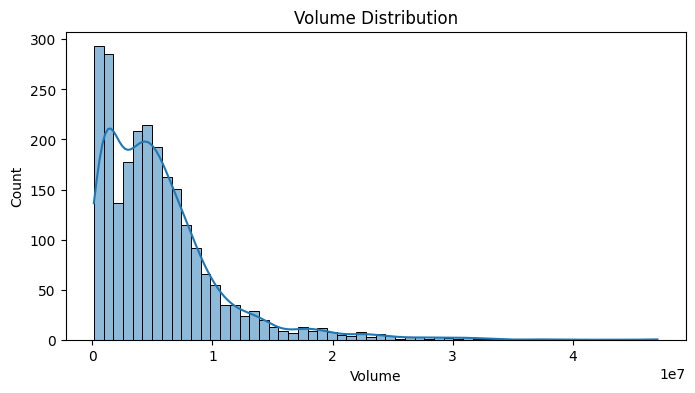

In [82]:
plt.figure(figsize=(8,4))
sns.histplot(df['Volume'], kde=True)
plt.title("Volume Distribution")
plt.show()

#### **Boxplots (Outlier Detection)**

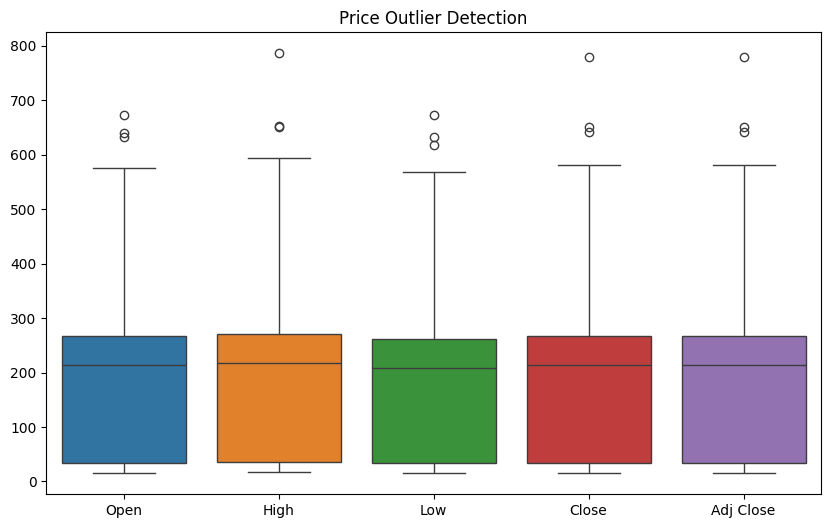

In [83]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Open','High','Low','Close','Adj Close']])
plt.title("Price Outlier Detection")
plt.show()

#### **Correlation Heatmap**

C:\Users\VADLAS\AppData\Local\Temp\ipykernel_10840\2911932257.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


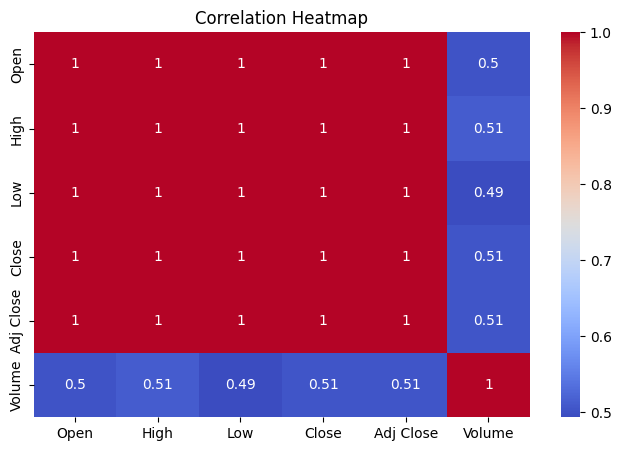

In [84]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### **Rolling Averages (Trend Analysis)**

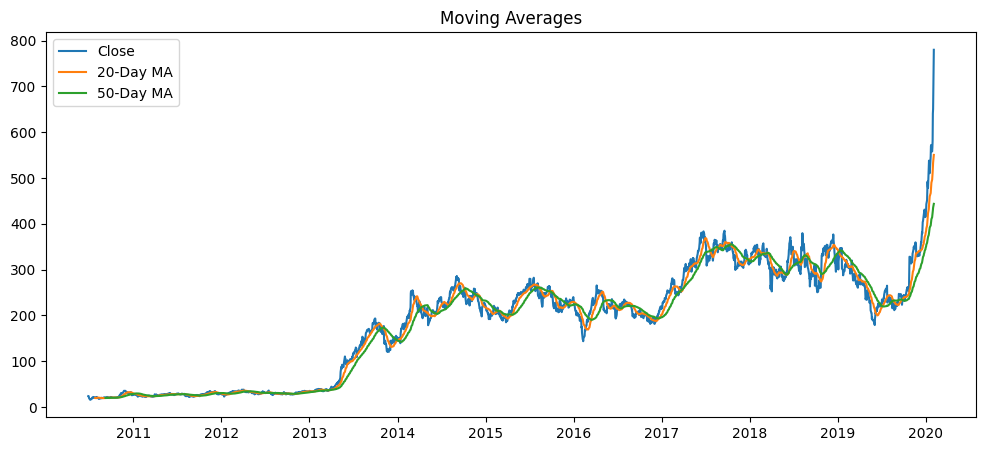

In [85]:
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label="Close")
plt.plot(df['Date'], df['MA20'], label="20-Day MA")
plt.plot(df['Date'], df['MA50'], label="50-Day MA")
plt.title("Moving Averages")
plt.legend()
plt.show()


## ***4. Feature Engineering & Data Pre-processing***

### Feature Selection & Time Handling

In [86]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

data = df[['Adj Close']]

### Missing Value Handling (Time-Series Aware)

In [87]:
data.isnull().sum()
data.fillna(method='ffill', inplace=True)

C:\Users\VADLAS\AppData\Local\Temp\ipykernel_10840\2701968070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(method='ffill', inplace=True)


### Data Visualization

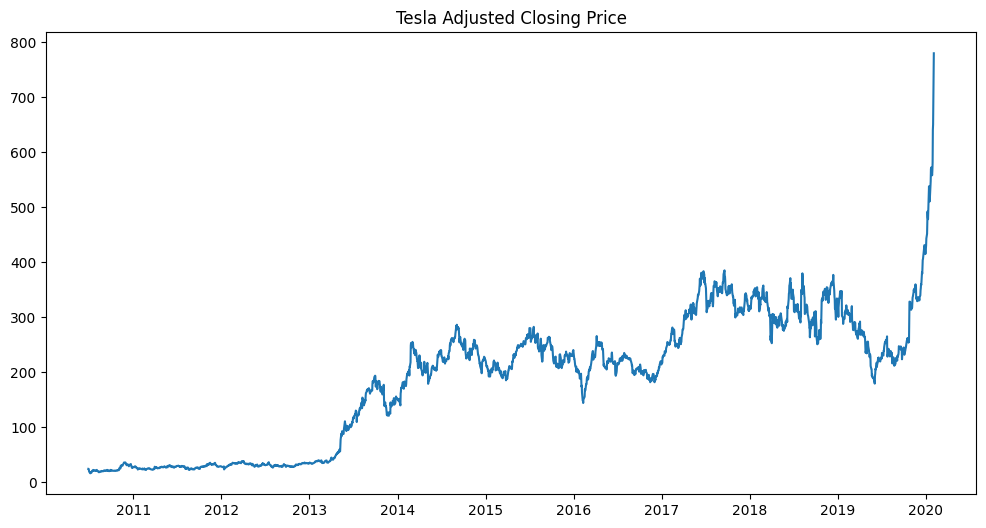

In [88]:
plt.figure(figsize=(12,6))
plt.plot(data)
plt.title("Tesla Adjusted Closing Price")
plt.show()


### Scaling the Data

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


### Train–Test Split (No Shuffling)

In [90]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

### Creating Time-Series Sequences

In [91]:
def create_sequences(dataset, time_steps=60):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:i+time_steps, 0])
        y.append(dataset[i+time_steps, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

X_train = X_train.reshape(X_train.shape[0], 60, 1)
X_test = X_test.reshape(X_test.shape[0], 60, 1)


## ***5. DL Modeling***

### Building SimpleRNN Model

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

rnn_model = Sequential([
    Input(shape=(60,1)),
    SimpleRNN(50),
    Dropout(0.2),
    Dense(1)
])

rnn_model.compile(loss='mse', optimizer='adam')


### Building LSTM Model

In [93]:
from tensorflow.keras.layers import LSTM

lstm_model = Sequential([
    Input(shape=(60,1)),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(loss='mse', optimizer='adam')


### Training Models

In [94]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

rnn_model.fit(X_train, y_train, epochs=30, batch_size=32,
              validation_split=0.1, callbacks=[early_stop])

lstm_model.fit(X_train, y_train, epochs=30, batch_size=32,
               validation_split=0.1, callbacks=[early_stop])


Epoch 1/30
53/53 [==============================] - 3s 18ms/step - loss: 0.0094 - val_loss: 0.0046
Epoch 2/30
53/53 [==============================] - 1s 10ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 3/30
53/53 [==============================] - 1s 10ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 4/30
53/53 [==============================] - 1s 13ms/step - loss: 8.2903e-04 - val_loss: 0.0016
Epoch 5/30
53/53 [==============================] - 1s 10ms/step - loss: 8.6642e-04 - val_loss: 8.1323e-04
Epoch 6/30
53/53 [==============================] - 1s 11ms/step - loss: 7.6345e-04 - val_loss: 7.7167e-04
Epoch 7/30
53/53 [==============================] - 1s 10ms/step - loss: 6.3249e-04 - val_loss: 0.0018
Epoch 8/30
53/53 [==============================] - 1s 10ms/step - loss: 7.1677e-04 - val_loss: 7.1397e-04
Epoch 9/30
53/53 [==============================] - 1s 10ms/step - loss: 6.4249e-04 - val_loss: 7.8314e-04
Epoch 10/30
53/53 [==============================] - 1s 10ms/step - l

### Model Evaluation & Prediction

In [95]:
from sklearn.metrics import mean_squared_error

rnn_pred = scaler.inverse_transform(rnn_model.predict(X_test))
lstm_pred = scaler.inverse_transform(lstm_model.predict(X_test))
y_actual = scaler.inverse_transform(y_test.reshape(-1,1))

rnn_mse = mean_squared_error(y_actual, rnn_pred)
lstm_mse = mean_squared_error(y_actual, lstm_pred)


14/14 [==============================] - 1s 11ms/step


## ***6. GridSearchCV***

### Hyperparameter Tuning using GridSearchCV (Demonstration)

SciKeras is used as a wrapper to integrate Keras models with GridSearchCV.
A lightweight configuration is used due to the computational cost of deep
learning models.


In [96]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam


In [97]:
def build_rnn_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        Input(shape=(X_train.shape[1], 1)),
        SimpleRNN(units=units),
        Dropout(dropout_rate),
        Dense(1)
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="mean_squared_error"
    )
    return model


In [98]:
rnn_regressor = KerasRegressor(
    model=build_rnn_model,
    epochs=5,          # kept LOW for demo
    batch_size=32,
    verbose=0
)

In [99]:
param_grid = {
    "model__units": [32, 50],
    "model__dropout_rate": [0.1, 0.2],
    "model__learning_rate": [0.001, 0.01]
}


In [100]:
grid_search = GridSearchCV(
    estimator=rnn_regressor,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=2
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=2,
             estimator=KerasRegressor(batch_size=32, epochs=5, model=<function build_rnn_model at 0x00000161DFA7C4A0>, verbose=0),
             param_grid={'model__dropout_rate': [0.1, 0.2],
                         'model__learning_rate': [0.001, 0.01],
                         'model__units': [32, 50]},
             scoring='neg_mean_squared_error')

In [101]:
grid_search.best_params_

{'model__dropout_rate': 0.1, 'model__learning_rate': 0.01, 'model__units': 32}

#### **Saving the best models**

In [102]:
rnn_model.save("models/rnn_best_model.h5")
lstm_model.save("models/lstm_best_model.h5")

# **Webservices Link**

https://teslastockprediction.streamlit.app/

# **Conclusion**

- The project successfully implemented both **SimpleRNN** and **LSTM** models to forecast Tesla stock prices using historical time-series data.
- LSTM performed more robustly due to its **memory gates**, allowing it to capture long-term dependencies better than SimpleRNN.
- Both models were able to identify **general price direction and trends**, proving deep learning’s strength in sequential data analysis.
- However, the models rely solely on past price movements, making predictions vulnerable to:
  - Sudden market volatility  
  - News events and external shocks  
  - Macroeconomic fluctuations  
- Enhancing the model with **additional features** such as volume, sentiment scores, or technical indicators could improve accuracy.
- Advanced architectures like **GRU, Transformers, or hybrid ensembles** can be explored for improved performance and long-range understanding.
- Predictions should be used as **supportive insights**, not as financial advice, due to the inherent uncertainty in stock markets.
- Final recommendation: always compare both SimpleRNN and LSTM outputs, evaluate their errors, and use insights cautiously for decision-making.
